In [2]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [46]:
ol_df = pd.read_csv('OLPFF.csv') #Reading in Positional data
metric = 'weighted_avg_block_percent' #Using average block percentage to predict

In [47]:
print(ol_df.columns)

Index(['Unnamed: 0.1', 'Year', 'Team', 'Position',
       'weighted_avg_snap_counts_offense', 'weighted_avg_block_percent',
       'weighted_avg_declined_penalties', 'weighted_avg_franchise_id',
       'weighted_avg_grades_offense', 'weighted_avg_grades_pass_block',
       'weighted_avg_grades_run_block', 'weighted_avg_hits_allowed',
       'weighted_avg_hurries_allowed', 'weighted_avg_non_spike_pass_block',
       'weighted_avg_non_spike_pass_block_percentage',
       'weighted_avg_pass_block_percent', 'weighted_avg_pbe',
       'weighted_avg_penalties', 'weighted_avg_pressures_allowed',
       'weighted_avg_sacks_allowed', 'weighted_avg_snap_counts_block',
       'weighted_avg_snap_counts_ce', 'weighted_avg_snap_counts_lg',
       'weighted_avg_snap_counts_lt', 'weighted_avg_snap_counts_pass_block',
       'weighted_avg_snap_counts_pass_play', 'weighted_avg_snap_counts_rg',
       'weighted_avg_snap_counts_rt', 'weighted_avg_snap_counts_run_block',
       'weighted_avg_snap_counts_te

In [48]:
drop_col = ['Unnamed: 0', 'Unnamed: 0.1']
ol_df = ol_df.drop(columns=drop_col)

In [49]:
ol_df.head(20)

,Year,Team,Position,weighted_avg_snap_counts_offense,weighted_avg_block_percent,weighted_avg_declined_penalties,weighted_avg_franchise_id,weighted_avg_grades_offense,weighted_avg_grades_pass_block,weighted_avg_grades_run_block,...,Previous_snap_counts_te,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF,Total DVOA,win-loss-pct,Net EPA
0,2019,49ers,OL,662.458691,96.139135,0.170900,28.0,63.017456,68.190475,59.976900,...,41.810652,14.224230,434.877698,36.0,46.0,70.501058,65.120377,27.90%,0.8125,0.216
1,2019,Bears,OL,759.998305,97.383057,1.159690,6.0,63.065766,63.979803,59.991360,...,9.020225,7.279490,231.529311,43.0,31.0,69.843681,61.965669,-2.10%,0.5000,-0.032
2,2019,Bengals,OL,759.564553,97.642233,0.147813,7.0,57.485792,61.343623,54.929307,...,15.566120,15.499469,309.079455,43.0,33.0,59.900018,55.264855,-25.20%,0.1250,-0.193
3,2019,Bills,OL,560.380878,94.114528,1.311794,4.0,60.221756,62.464287,59.228500,...,25.979112,15.435707,274.425221,26.0,37.0,60.528950,62.691512,2.70%,0.6250,0.061
4,2019,Broncos,OL,699.393958,93.332885,0.697608,10.0,66.687159,72.724448,61.507985,...,12.760149,13.740701,395.666035,30.0,32.0,66.597719,66.602448,-9.00%,0.4375,-0.053
5,2019,Browns,OL,754.923078,95.856853,0.985223,8.0,63.837980,74.047740,58.845927,...,30.394233,18.246546,412.166910,41.0,42.0,71.563016,62.586725,-10.10%,0.3750,-0.076
6,2019,Buccaneers,OL,793.214473,94.462770,0.237257,30.0,68.787049,67.832982,64.593261,...,12.131440,22.088204,150.602944,45.0,45.0,61.804343,69.990388,1.50%,0.4375,0.072
7,2019,Cardinals,OL,860.499493,96.306883,0.032026,1.0,60.524035,71.363944,53.381251,...,12.374974,14.383634,189.512855,26.0,43.0,58.404447,62.112593,-5.80%,0.3125,-0.081
8,2019,Chargers,OL,544.049401,92.238363,0.485103,27.0,58.915261,62.472415,56.338726,...,56.119839,12.959617,293.327813,48.0,44.0,60.269466,57.432533,-6.70%,0.3125,0.000
9,2019,Chiefs,OL,724.052026,92.762864,1.403070,16.0,61.274848,69.311511,54.286739,...,15.767183,14.946865,441.561038,66.0,54.0,68.379473,64.248001,30.20%,0.7500,0.133


In [50]:
team_data = ol_df.groupby('Team')
ol_df.head(32)#check all the teams are have their ol values grouped

,Year,Team,Position,weighted_avg_snap_counts_offense,weighted_avg_block_percent,weighted_avg_declined_penalties,weighted_avg_franchise_id,weighted_avg_grades_offense,weighted_avg_grades_pass_block,weighted_avg_grades_run_block,...,Previous_snap_counts_te,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF,Total DVOA,win-loss-pct,Net EPA
0,2019,49ers,OL,662.458691,96.139135,0.170900,28.0,63.017456,68.190475,59.976900,...,41.810652,14.224230,434.877698,36.0,46.0,70.501058,65.120377,27.90%,0.8125,0.216
1,2019,Bears,OL,759.998305,97.383057,1.159690,6.0,63.065766,63.979803,59.991360,...,9.020225,7.279490,231.529311,43.0,31.0,69.843681,61.965669,-2.10%,0.5000,-0.032
2,2019,Bengals,OL,759.564553,97.642233,0.147813,7.0,57.485792,61.343623,54.929307,...,15.566120,15.499469,309.079455,43.0,33.0,59.900018,55.264855,-25.20%,0.1250,-0.193
3,2019,Bills,OL,560.380878,94.114528,1.311794,4.0,60.221756,62.464287,59.228500,...,25.979112,15.435707,274.425221,26.0,37.0,60.528950,62.691512,2.70%,0.6250,0.061
4,2019,Broncos,OL,699.393958,93.332885,0.697608,10.0,66.687159,72.724448,61.507985,...,12.760149,13.740701,395.666035,30.0,32.0,66.597719,66.602448,-9.00%,0.4375,-0.053
5,2019,Browns,OL,754.923078,95.856853,0.985223,8.0,63.837980,74.047740,58.845927,...,30.394233,18.246546,412.166910,41.0,42.0,71.563016,62.586725,-10.10%,0.3750,-0.076
6,2019,Buccaneers,OL,793.214473,94.462770,0.237257,30.0,68.787049,67.832982,64.593261,...,12.131440,22.088204,150.602944,45.0,45.0,61.804343,69.990388,1.50%,0.4375,0.072
7,2019,Cardinals,OL,860.499493,96.306883,0.032026,1.0,60.524035,71.363944,53.381251,...,12.374974,14.383634,189.512855,26.0,43.0,58.404447,62.112593,-5.80%,0.3125,-0.081
8,2019,Chargers,OL,544.049401,92.238363,0.485103,27.0,58.915261,62.472415,56.338726,...,56.119839,12.959617,293.327813,48.0,44.0,60.269466,57.432533,-6.70%,0.3125,0.000
9,2019,Chiefs,OL,724.052026,92.762864,1.403070,16.0,61.274848,69.311511,54.286739,...,15.767183,14.946865,441.561038,66.0,54.0,68.379473,64.248001,30.20%,0.7500,0.133


In [51]:
sequences = []
targets = []

#Iterating over team and their data
for team, group in team_data:
    if len(group) >= 4:
        print(f"Processing team: {team}, data length(years): {len(group)}")
        
        #Iterate through data to make sequences for every 3 years
        for i in range(len(group) - 3):
            sequence = group.iloc[i:i+3][['Previous_block_percent', 'Previous_grades_offense', 'Previous_grades_pass_block', 'Previous_grades_run_block','Previous_hits_allowed', 'Previous_pressures_allowed']]
            #target the proceeding year's Current PFF to compare
            target = group.iloc[i+3]['weighted_avg_block_percent']
            sequences.append(sequence.values) #Add sequence values to sequence list
            targets.append(target) #Add target values to target list
            
#Convert lists to numpy arrays
s = np.array(sequences)
t = np.array(targets)

print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {s.shape}, y shape: {t.shape}")

Processing team: 49ers, data length(years): 4
Processing team: Bears, data length(years): 4
Processing team: Bengals, data length(years): 4
Processing team: Bills, data length(years): 4
Processing team: Broncos, data length(years): 4
Processing team: Browns, data length(years): 4
Processing team: Buccaneers, data length(years): 4
Processing team: Cardinals, data length(years): 4
Processing team: Chargers, data length(years): 4
Processing team: Chiefs, data length(years): 4
Processing team: Colts, data length(years): 4
Processing team: Commanders, data length(years): 4
Processing team: Cowboys, data length(years): 4
Processing team: Dolphins, data length(years): 4
Processing team: Eagles, data length(years): 4
Processing team: Falcons, data length(years): 4
Processing team: Giants, data length(years): 4
Processing team: Jaguars, data length(years): 4
Processing team: Jets, data length(years): 4
Processing team: Lions, data length(years): 4
Processing team: Packers, data length(years): 4

In [52]:
# Reshape X to (samples, timesteps, features)
S = s.reshape(s.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(S.shape)  # Should now be (samples, 3, features)
print(S)

(32, 3, 6)
[[[94.5565952  66.17253921 63.68095799 65.45302567  4.19461799
   18.88205595]
  [96.1391349  63.01745565 68.19047485 59.97689971  1.73671953
   14.49488312]
  [96.35795788 67.57025724 56.80740233 70.38029056  4.65267049
   16.55554291]]

 [[97.60569284 70.22689744 71.99447365 65.09810991  1.06273685
   13.21131793]
  [97.38305737 63.06576553 63.97980296 59.99136005  3.14395581
   17.37729967]
  [94.86396985 61.8420493  52.57599562 66.66205037  1.88969943
   14.26954322]]

 [[95.93165304 60.89468144 64.69113201 60.99233894  1.34330181
   17.07835883]
  [97.64223283 57.48579208 61.34362328 54.92930724  2.45400698
   21.19286338]
  [92.99585157 56.30215046 54.9578474  61.70551618  3.00313621
   13.16418752]]

 [[94.33364997 57.8737278  64.21425119 54.31058169  1.92418677
   14.40986315]
  [94.11452794 60.22175568 62.4642866  59.22850049  1.80950227
   13.67092508]
  [95.77746955 67.09935829 66.5174057  67.48547052  1.38282782
   15.88119137]]

 [[96.19581387 66.87193699 66.740

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer
inputs = Input(shape=(3, 6))  # 3 time steps, 6 features because I had less features than 8

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138.4005
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.9785
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 81.1310
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 95.3662
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 143.4637
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 94.6068
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 152.2560
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67.1502
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 112.7051
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 84.9961
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 77.4151
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 60.7532
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 169.4893
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 105.5024
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 5

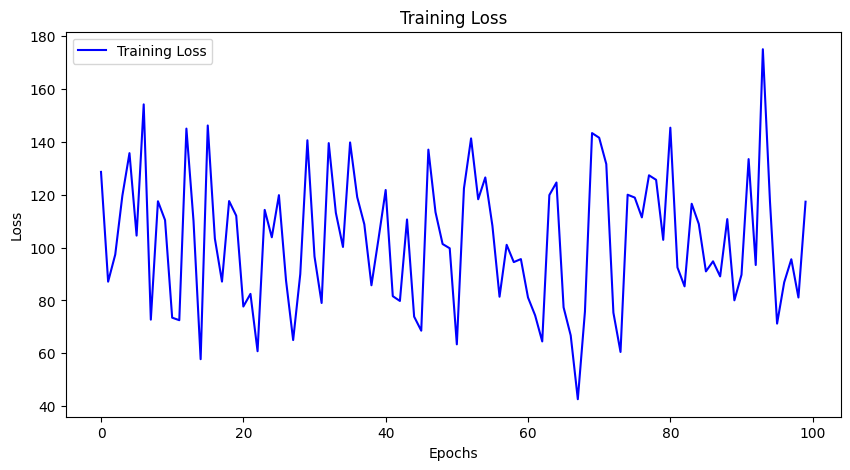

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.0029


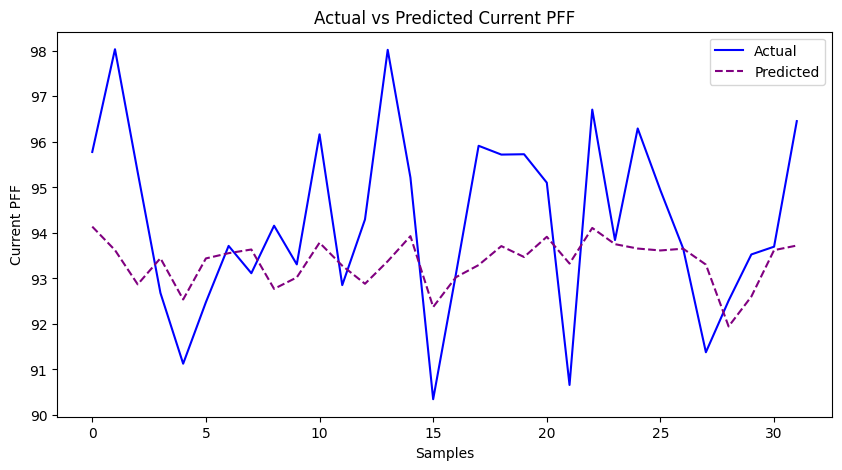

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 139.0034
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 209.7119  
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.2635 
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.4006
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 140.5427
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.0668
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 120.2691
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110.7283  
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.4795 
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63.8256  
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122.6183
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.0959
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95.0590
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 137.9530 
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.6

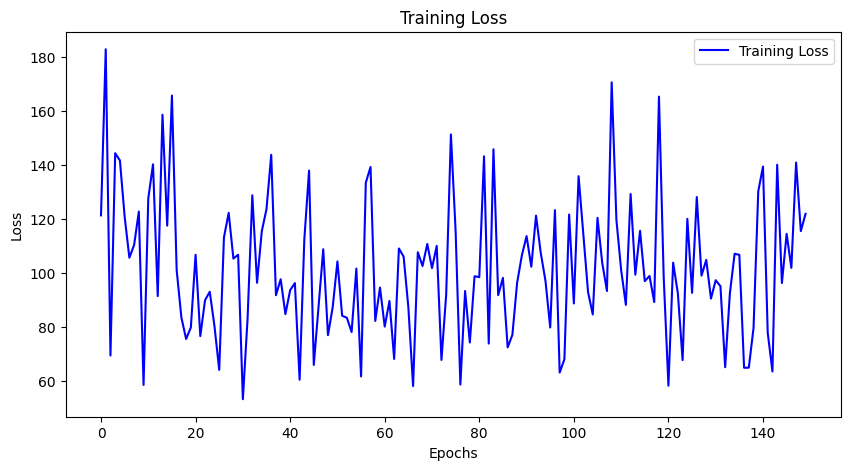

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: -1.9096


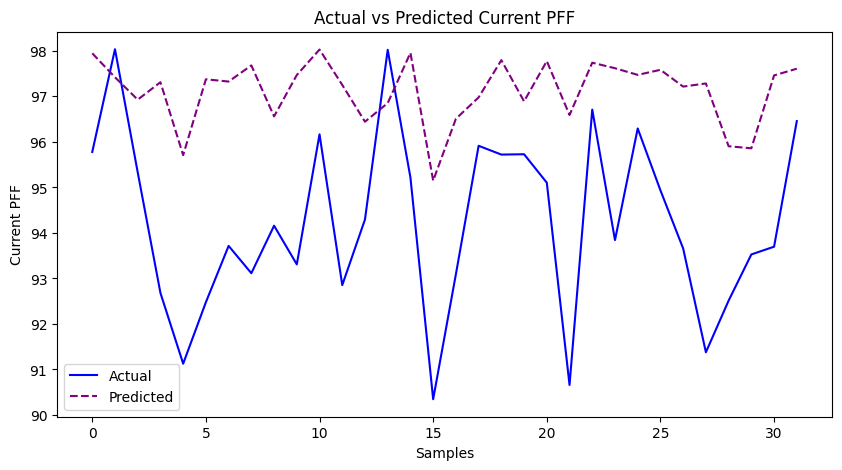

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113.0727
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71.4099  
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 104.3560
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 99.9078
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 76.8212 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 205.6895
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 76.8338
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 113.9229
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 87.9957
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 130.1437
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 103.0717
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 57.0171
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 129.9454
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 55.0749
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step -

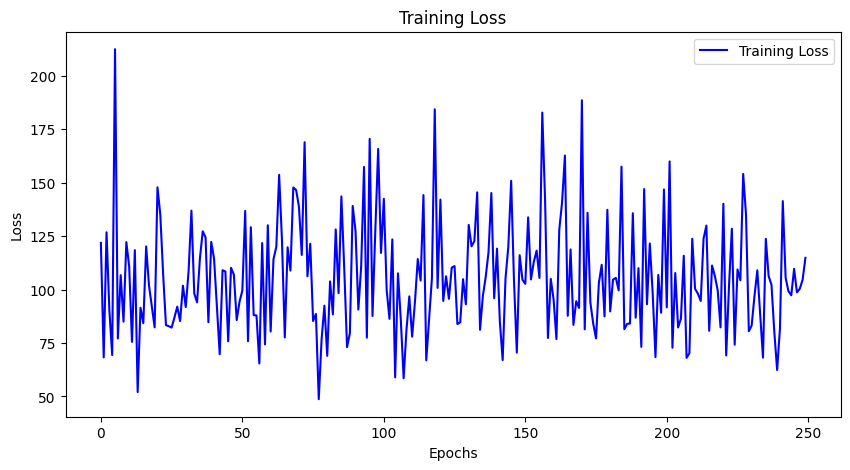

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.4515


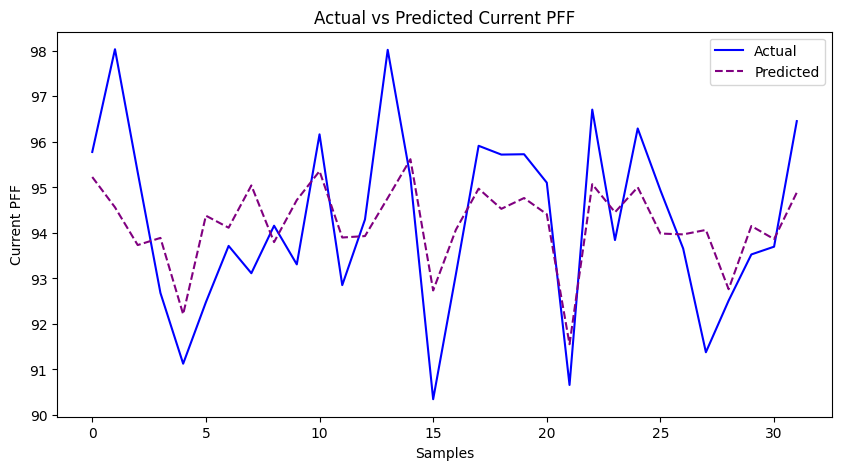

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.9479 
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 91.5345
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 108.4377
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 63.5009
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 110.3596
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 131.5415
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 114.9514
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 115.0642
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 63.8430
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 93.0545
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 124.6760
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138.3118 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 85.1452
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 92.2214
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step 

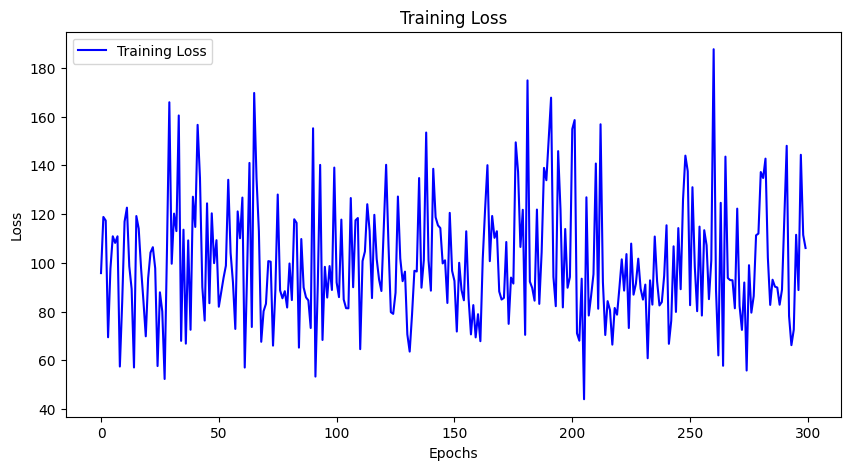

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: -5.6184


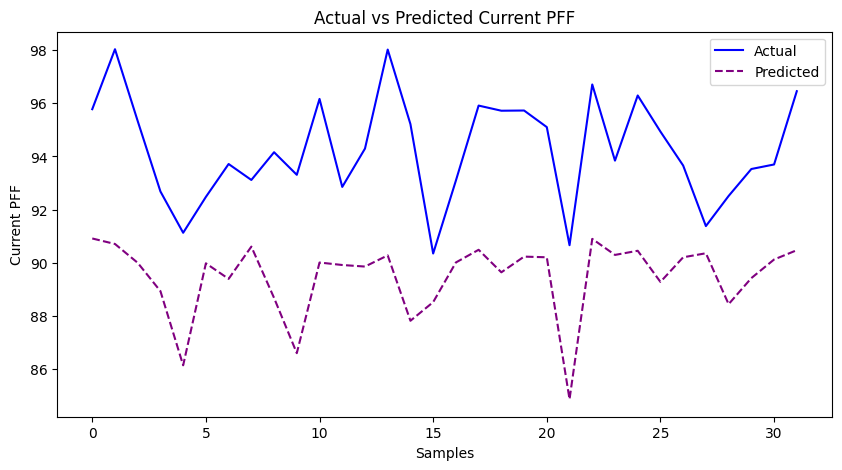

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157.2344
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 59.4410
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 174.9919
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 157.4398
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 78.0338
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 146.1676
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 64.5730
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 83.9774
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 90.7361
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 94.8584
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 81.2154
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 114.2710
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 125.8981
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 99.0989
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step -

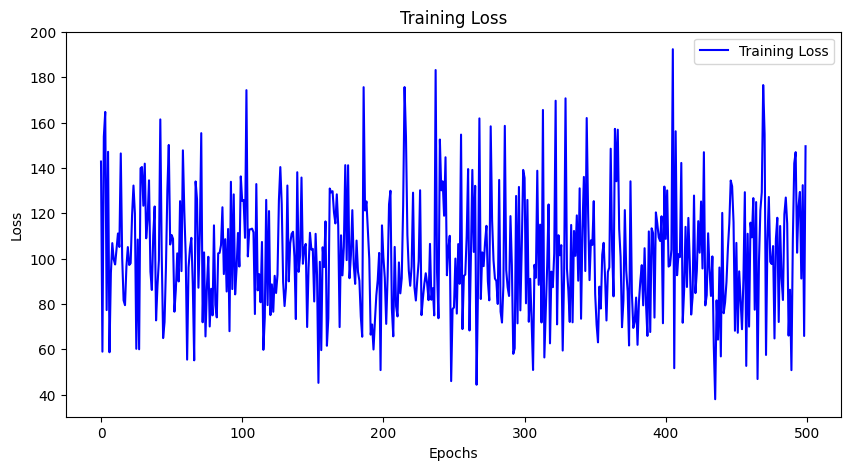

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.4878


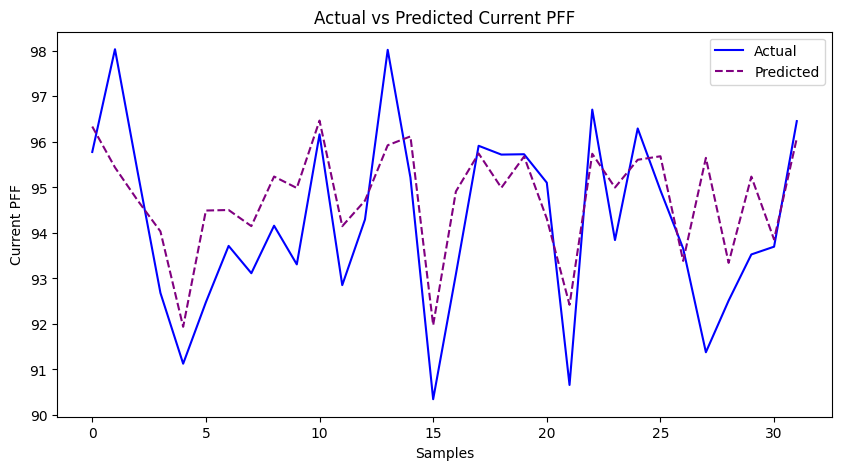

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 143.1392
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 123.9366
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 115.7047
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 118.4899
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 66.9146
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 133.4189
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 114.6468
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 66.3116
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 54.9394
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 48.4071
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 70.8467
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 102.3404
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 106.2842
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 89.0126
Epoch 15/1000
4/4 ━━━━━━━━━━━━━━━━━

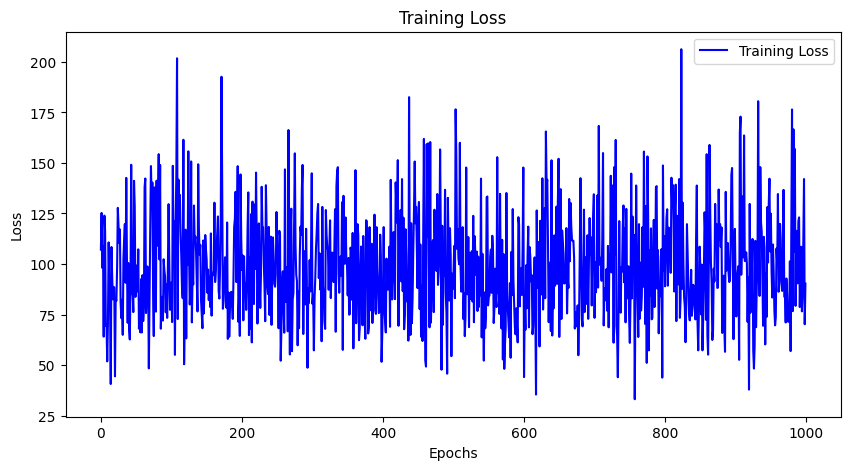

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.5280


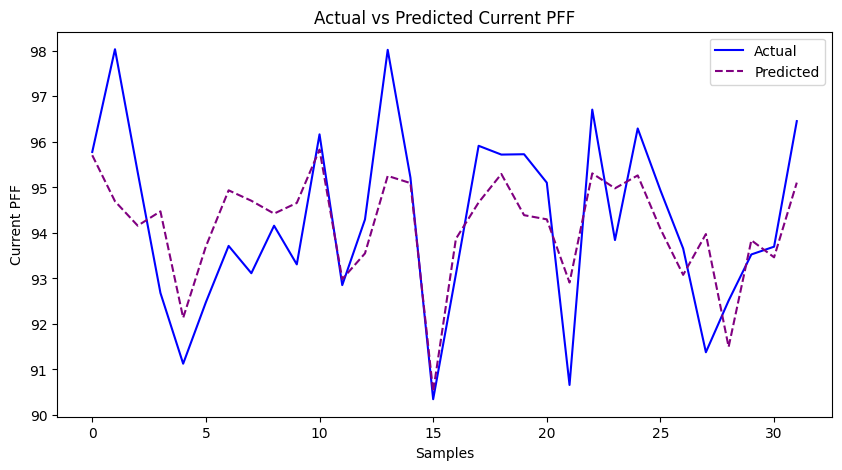

In [58]:
#Training the Model using RNN
epoch_list = [100,150,250, 300, 500, 1000]
for e in epoch_list:
    history = model.fit(S, t, epochs=e, batch_size = 9)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    #Making predictions on the test set
    t_pred = model.predict(S)
    from sklearn.metrics import r2_score
    
    #Calculating R² score
    r2 = r2_score(t, t_pred)
    
    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(t, label='Actual', color='blue')
    plt.plot(t_pred, label='Predicted', color='purple', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()